# Simple XGBoost and LightGBM
 
Copying the [simple XGBoost submission](https://www.kaggle.com/inversion/ieee-simple-xgboost).

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from src.dataset.make_dataset import Dataset
from src.features.build_features import label_encode
from src.model.train_model import train_xgb, train_lgb
from src.model.predict_model import write_submission
from src.model.utils import save_model, load_model
from src.visualization.model_visualizer import TreeVisualizer

%matplotlib inline

## Start with XGBoost

In [3]:
ds = Dataset()
ds.load_dataset('_label_encode')
#ds.load_dataset()
#label_encode(ds)
#ds.save_dataset('_label_encode')

In [4]:
ds.X_train.head(5)

,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
TransactionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2987000,86400,68.5,4,13926,-999.0,150.0,2,142.0,2,315.0,87.0,19,65535,0,0,1,1,0,0,0,1,0,0,1,0,2,0,1,1,14,65535,13,-999.0,65535,-999.0,65535,-999.0,-999.0,13,13.0,-999.0,65535,-999.0,0.0,2,2,2,3,1,2,0,0,0,1,1,1,1,1,1,1,1,1,0,0,1,1,1,0,0,0,0,1,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,1,1,1,1,0,0,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,255,255,255,255,255,65535,255,65535,255,255,255,255,-999.0,-999.0,-999.0,255,255,255,255,255,255,-999.000000,-999.000000,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,65535,65535,255,255,255,255,255,255,255,255,65535,65535,65535,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,65535,65535,65535,255,65535,65535,255,255,255,255,65535,255,255,255,65535,65535,65535,255,255,255,255,255,255,255,255,255,255,255,65535,255,255,255,255,255,255,255,255,255,255,255,255,255,65535,255,255,255,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0,0,0,1,1,0,0,0,0,0,0,1.0,1.0,1.0,0,1,0,0,0,0,0,0,0,0,0,0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,65535,65535,65535,255,255,255,255,255,255,-999.0,-999.0,

In [5]:
#xgb_clf = train_xgb(ds)

In [6]:
#write_submission(ds, xgb_clf, "simple_xgboost.csv")

In [7]:
# save model to file
#save_model(xgb_clf, "simple_xgb.pickle.dat")

#### Quick model analysis

In [8]:
xgb_clf = load_model("simple_xgb.pickle.dat")

In [9]:
sample = ds.X_train.sample(1000, random_state=314)

In [10]:
xgb_tv = TreeVisualizer(xgb_clf, sample)

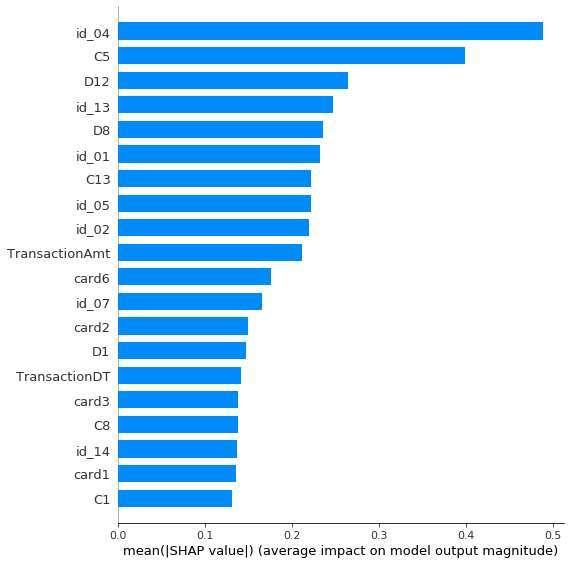

In [11]:
xgb_tv.summary_bar_plot()

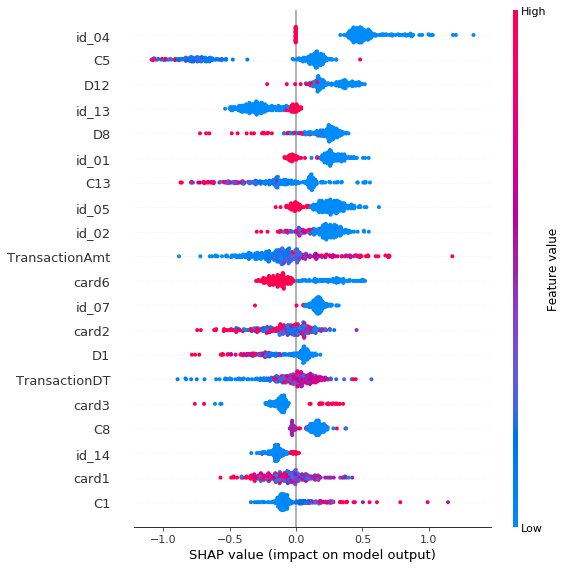

In [12]:
xgb_tv.summary_plot()

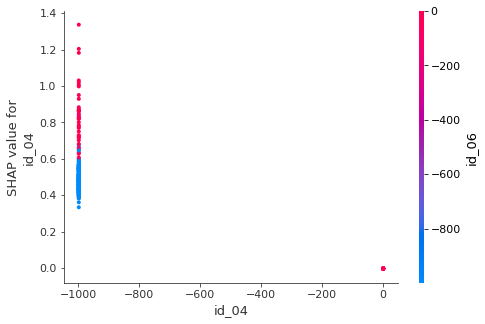

In [13]:
xgb_tv.dependence_plot("id_04")

In [14]:
importance_df = xgb_tv.get_importances()
importance_df.head(25)

,column_name,shap_importance
395,id_04,0.488024
19,C5,0.39924
40,D12,0.264442
404,id_13,0.247405
36,D8,0.236234
392,id_01,0.232332
27,C13,0.222449
396,id_05,0.222325
393,id_02,0.219196
1,TransactionAmt,0.211642


#### Maybe we can study those columns a bit 

In [40]:
important_cols = importance_df[importance_df['shap_importance']>0.20]['column_name'].values
important_cols

array(['id_04', 'C5', 'D12', 'id_13', 'D8', 'id_01', 'C13', 'id_05',
       'id_02', 'TransactionAmt'], dtype=object)

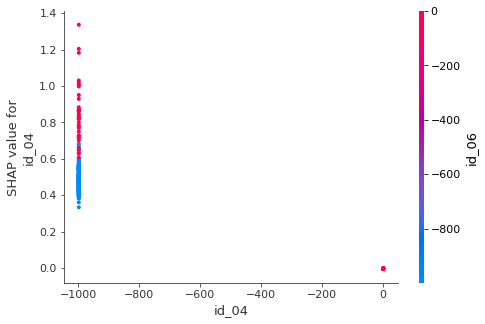

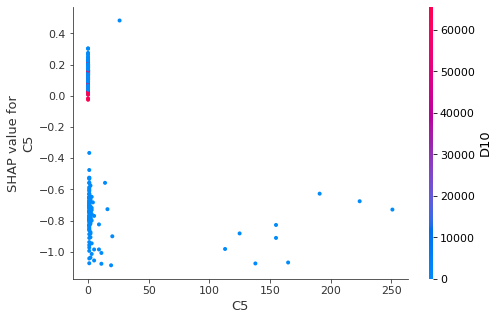

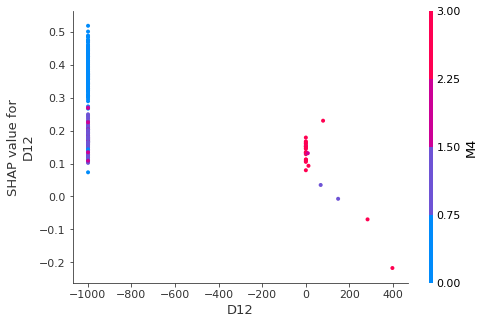

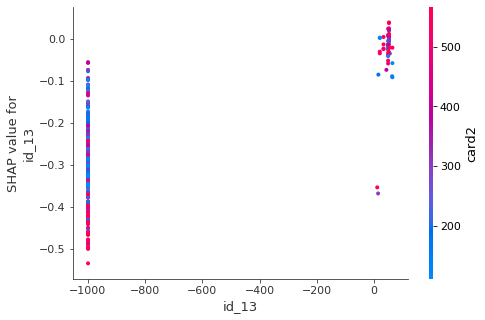

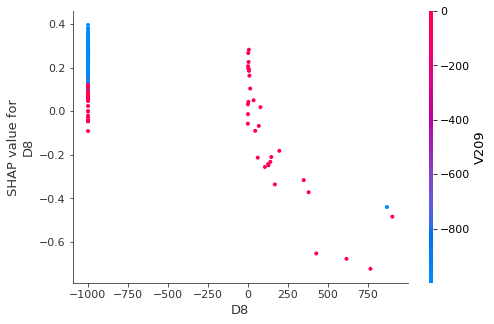

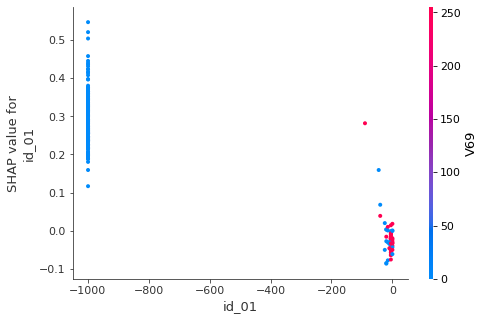

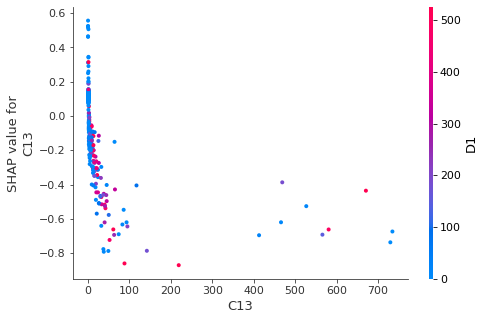

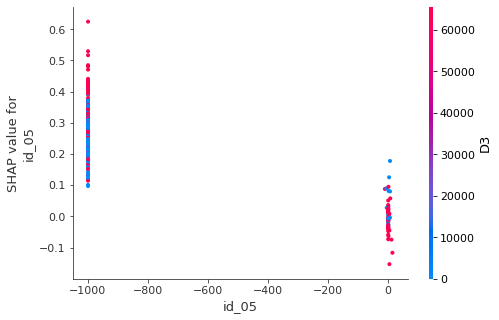

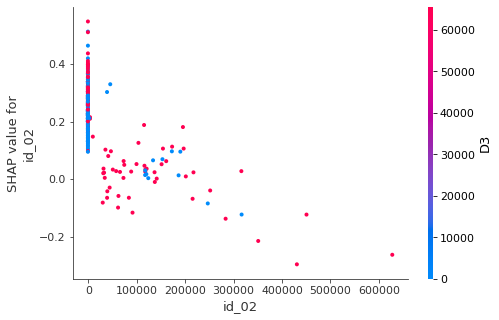

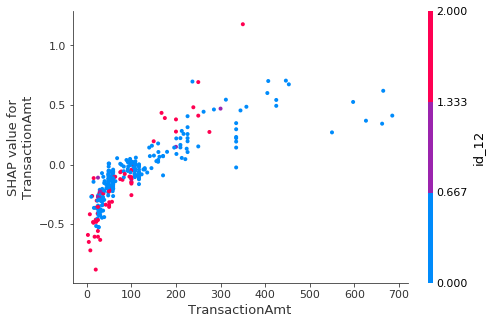

In [41]:
for name in important_cols:
    xgb_tv.dependence_plot(name)

#### Build a model on this sub selection, see if we can check interactions

In [42]:
ds_important = Dataset()
ds_important.X_train = ds.X_train[important_cols]
ds_important.X_test = ds.X_test[important_cols]
ds_important.y_train = ds.y_train
ds_important.sample_submission = ds.sample_submission
ds_important.test_loaded = True

In [43]:
xgb_clf_important = train_xgb(ds_important)
#save_model(xgb_clf_important, "simple_xgb_important.pickle.dat")
#xgb_clf_important = load_model("simple_xgb_important.pickle.dat")

In [25]:
#write_submission(ds_important, xgb_clf_important, "simple_xgboost_important.csv")

In [44]:
sample = ds_important.X_train.sample(100, random_state=314)
xgb_tv_important = TreeVisualizer(xgb_clf_important, sample, interactions=True)

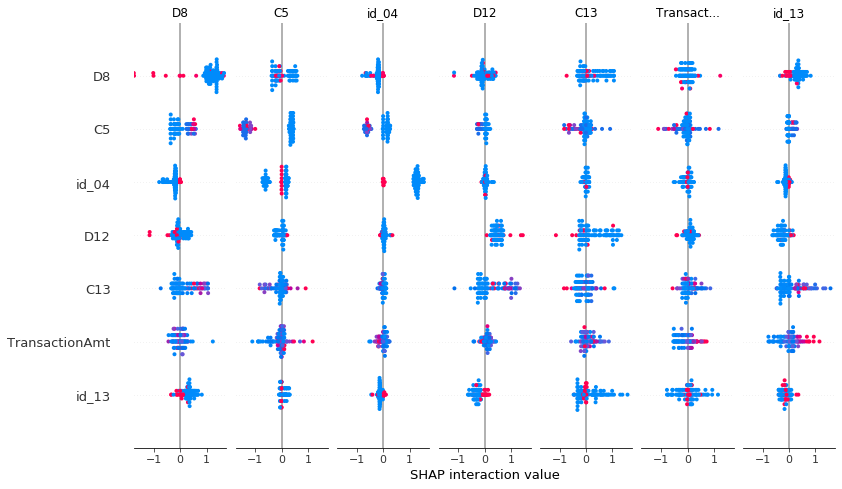

In [45]:
xgb_tv_important.interaction_summary_plot()

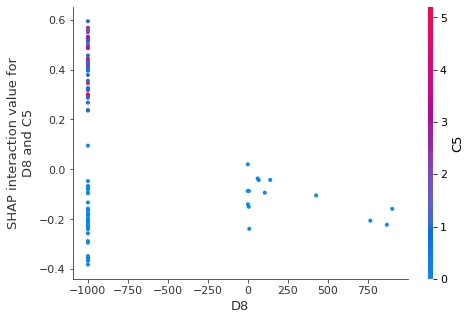

In [47]:
xgb_tv_important.interaction_dependence_plot(("D8", "C5"))

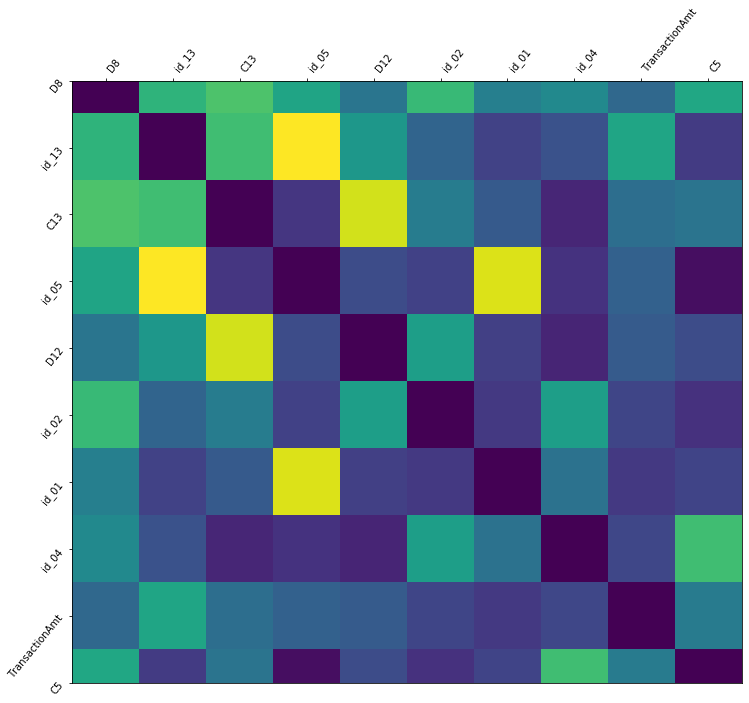

In [48]:
xgb_tv_important.interaction_matrix()

## Try LightGBM now

In [68]:
import numpy as np
ds.X_train = ds.X_train.replace({-999: np.nan})

In [69]:
lgb_clf = train_lgb(ds)

In [70]:
write_submission(ds, lgb_clf, "simple_lightgbm.csv")

In [71]:
save_model(lgb_clf, "simple_lgb.pickle.dat")

In [ ]:
lgb_clf = load_model("simple_lgb.pickle.dat")

In [72]:
sample = ds.X_train.sample(1000, random_state=314)

In [73]:
lgb_tv = TreeVisualizer(lgb_clf, sample)

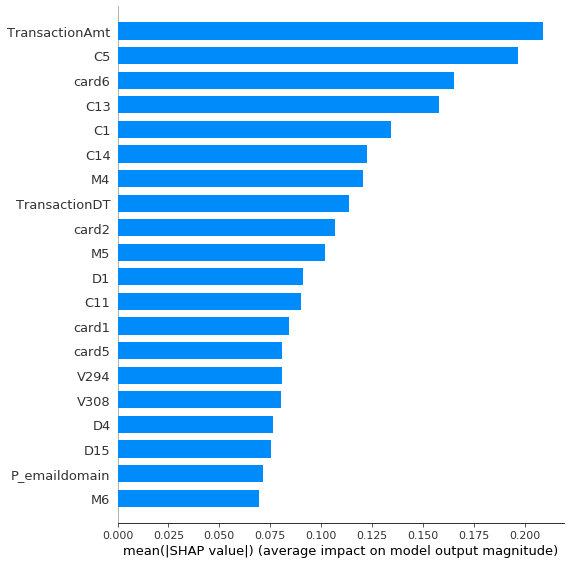

In [74]:
lgb_tv.summary_bar_plot()

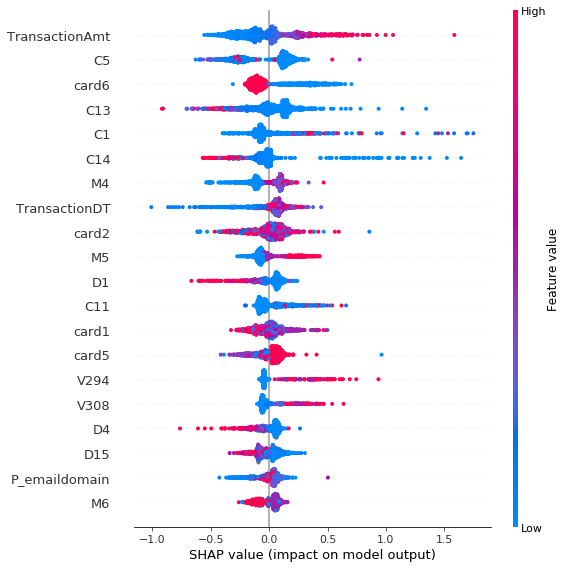

In [75]:
lgb_tv.summary_plot()

## Build mean of LightGBM and XGBoost

In [81]:
xgb_preds = pd.read_csv("../../data/submissions/simple_xgboost.csv")
lgb_preds = pd.read_csv("../../data/submissions/simple_lightgbm.csv")
xgb_preds = xgb_preds.rename(columns={"TransactionID": "xgb_TransactionID", "isFraud": "xgb_isFraud"})
lgb_preds = lgb_preds.rename(columns={"TransactionID": "lgb_TransactionID", "isFraud": "lgb_isFraud"})

In [82]:
xgb_preds.head(3)

,xgb_TransactionID,xgb_isFraud
0,3663549,0.001845
1,3663550,0.001297
2,3663551,0.005064


In [83]:
lgb_preds.head(3)

,lgb_TransactionID,lgb_isFraud
0,3663549,0.077475
1,3663550,0.170764
2,3663551,0.199705


In [85]:
preds = pd.concat([xgb_preds, lgb_preds], axis=1)
preds.head(3)

,xgb_TransactionID,xgb_isFraud,lgb_TransactionID,lgb_isFraud
0,3663549,0.001845,3663549,0.077475
1,3663550,0.001297,3663550,0.170764
2,3663551,0.005064,3663551,0.199705


In [98]:
preds['TransactionID'] = preds['xgb_TransactionID']
preds['isFraud'] = preds[['xgb_isFraud', 'lgb_isFraud']].mean(axis=1)

In [100]:
preds[['TransactionID', 'isFraud']].to_csv("../../data/submissions/simple_ensemble.csv", index=False)